# A Pythonic Card Deck

In [21]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

How iterability works
1. If an object defines \_\_iter__ Python uses that.
2. If not, Python falls back to the sequence protocol: it repeatedly calls \_\_getitem__ with increasing indices (0, 1, 2, ...) until IndexError.
- Because FrenchDeck implements \_\_getitem__ (and \_\_len__), it becomes iterable and supports typical sequence operations like iteration and slicing.

In [22]:
deck = FrenchDeck()

deck, len(deck), deck[0], deck[-1]

(<__main__.FrenchDeck at 0x2a428495550>,
 52,
 Card(rank='2', suit='spades'),
 Card(rank='A', suit='hearts'))

In [23]:
from random import choice

choice(deck)

Card(rank='Q', suit='diamonds')

In [24]:
deck[12::13]  # all the aces

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

In [31]:
for card in reversed(deck):
    print(card)

Card(rank='A', suit='hearts')
Card(rank='K', suit='hearts')
Card(rank='Q', suit='hearts')
Card(rank='J', suit='hearts')
Card(rank='10', suit='hearts')
Card(rank='9', suit='hearts')
Card(rank='8', suit='hearts')
Card(rank='7', suit='hearts')
Card(rank='6', suit='hearts')
Card(rank='5', suit='hearts')
Card(rank='4', suit='hearts')
Card(rank='3', suit='hearts')
Card(rank='2', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='K', suit='clubs')
Card(rank='Q', suit='clubs')
Card(rank='J', suit='clubs')
Card(rank='10', suit='clubs')
Card(rank='9', suit='clubs')
Card(rank='8', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='2', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(r

1. Iteration is often implicit. 
2. If a collection has no \_\_contains__ method, the in operator does a sequential scan.
- Case in point: in works with our FrenchDeck class because it is iterable.

In [26]:
Card('Q', 'hearts') in deck, Card('7', 'beasts') in deck

(True, False)

In [27]:
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)
def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit] # The result is a unique integer in 0..51      

In [28]:
for card in sorted(deck, key=spades_high):
    print(card)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='clubs')
Ca

1. Special methods is that they are meant to be called by the Python interpreter, and not by you.
2. You don’t write my_object.\_\_len__(). You
 write len(my_object) and, if my_object is an instance of a user-defined class, then
 Python calls the \_\_len__ method you implemented.
3. But the interpreter takes a shortcut when dealing for built-in types like list, str,
 bytearray, or extensions like the NumPy arrays. Python variable-sized collections
 written in C include a struct2 called PyVarObject, which has an ob_size field holding
 the number of items in the collection. So, if my_object is an instance of one of those
 built-ins, then len(my_object) retrieves the value of the ob_size field, and this is
 much faster than calling a method.

# Emulating Numeric Types

In [29]:
"""
A simplistic class demonstrating some special methods
It is simplistic for didactic reasons. It lacks proper error handling,
especially in the ``__add__`` and ``__mul__`` methods.
"""

import math

class Vector:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return f'Vector({self.x!r}, {self.y!r})'

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

Note that the f-string in our \_\_repr__ uses !r to get the standard representation of
the attributes to be displayed.This is good practice, because it shows the crucial difference between Vector(1, 2) and Vector('1', '2')—the latter would not work in
the context of this example, because the constructor’s arguments should be numbers,
not str.

Tip: In REPL, typing v shows repr(v); print(v) shows str(v) (or repr(v) if __str__ is not defined).

bool(x) calls x.\_\_bool__() and uses
the result. If \_\_bool__ is not implemented, Python tries to invoke x.\_\_len__(), and
if that returns zero, bool returns False. Otherwise bool returns True.

In [30]:
v1 = Vector(2, 4)
v2 = Vector(2, 1)
v1 + v2, abs(v1), v1 * 3, bool(v1), bool(Vector()), v1

(Vector(4, 5), 4.47213595499958, Vector(6, 12), True, False, Vector(2, 4))

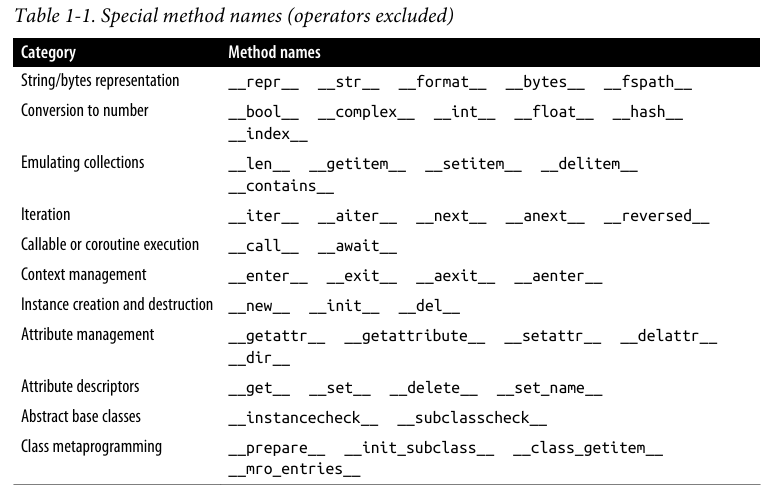

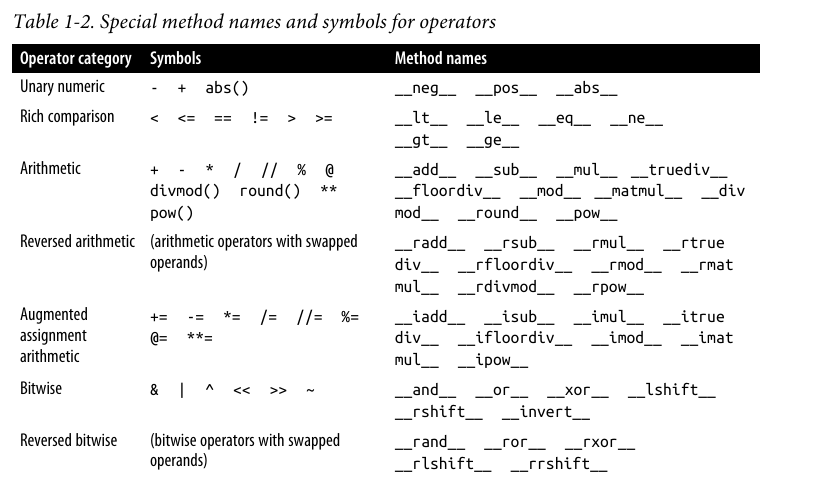
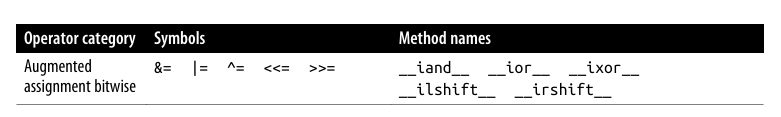

1. Reversed special method
- When you write a + b, Python first tries a.\_\_add__(b).
If that method is missing or returns NotImplemented, Python then tries b.\_\_radd__(a) — the right-hand object's chance to handle the operation.
- This lets the right-hand object decide how to combine itself with the left-hand one when the left-hand object doesn't know how.

2. Augmented assignment (+=)

- When you write a += b, Python first tries a.\_\_iadd__(b) (in-place add).
If \_\_iadd__ doesn't exist or returns NotImplemented, Python falls back to a = a + b (so it uses \_\_add__/\_\_radd__ like a normal +).
Important: \_\_iadd__ may modify a in place (like lists) or return a new object (like ints/tuples); either way, the name a ends up bound to the result.



Why len Is Not a Method?
- The length is simply read from a field in a C struct. 
-  len is not called as a method because it gets special treatment as part of the Python Data Model, just like abs. But thanks to the special method \_\_len__, you can also make len work with your own custom objects.